# Bilal korchi ML/AI

# Customer Churn Prediction using Neural Networks 

---

##  Introduction
Customer churn occurs when customers stop using a company’s services. Retaining existing customers is crucial for businesses as acquiring new ones is often more expensive.

In this project, we aim to build an **Artificial Neural Network (ANN)** model to predict whether a customer will churn using the **Churn_Modelling** dataset.

---
##  Objectives
- Load and preprocess the dataset.
- Build an ANN model to predict customer churn.
- Perform hyperparameter tuning using **Keras Tuner**.
- Evaluate and visualize model performance.
- Save the best-performing model for future use.

---

##  Dataset Information
The dataset contains information about customers of a bank:
- **Features (X):** CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, etc.
- **Target (y):** `Exited` (1 if the customer churned, 0 otherwise).

---

##  Libraries & Tools
- `pandas` & `numpy` for data manipulation.
- `scikit-learn` for preprocessing and train-test splitting.
- `tensorflow/keras` for building neural networks.
- `keras-tuner` for hyperparameter tuning.
- `matplotlib` & `seaborn` for visualization.

---

##  Workflow Overview
1. Importing the dataset
2. Data preprocessing (encoding, scaling)
3. Splitting the data into training and test sets
4. Building and tuning the ANN model
5. Training the model with optimal hyperparameters
6. Evaluating model performance
7. Visualizing training results
8. Saving the trained model

## Data preprocessing (encoding, scaling)


In [ ]:
import pandas as pd



dataset = pd.read_csv('../data/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [144]:
print("Missing values:\n", dataset.isnull().sum())


Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [146]:
n_colomns=dataset.select_dtypes(include=['int64', 'float64']).columns
n_colomns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Data Dsitribution

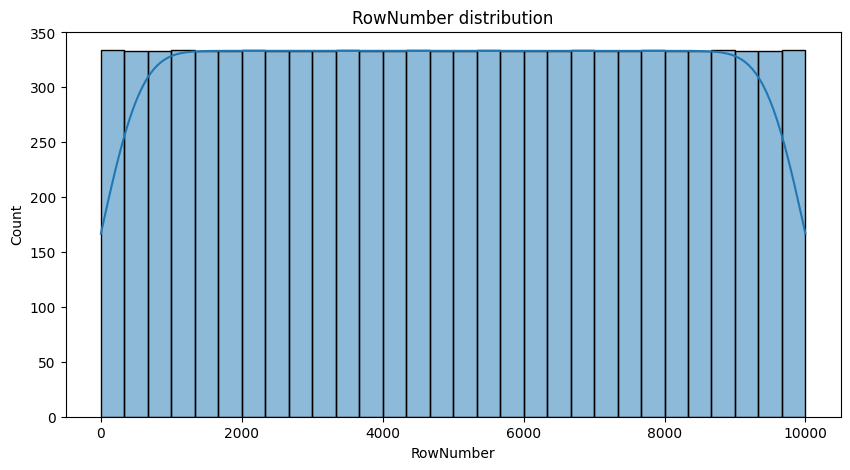

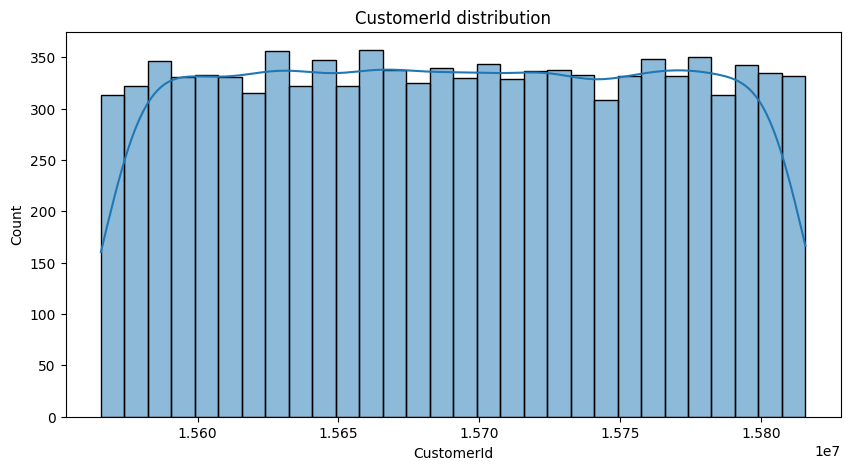

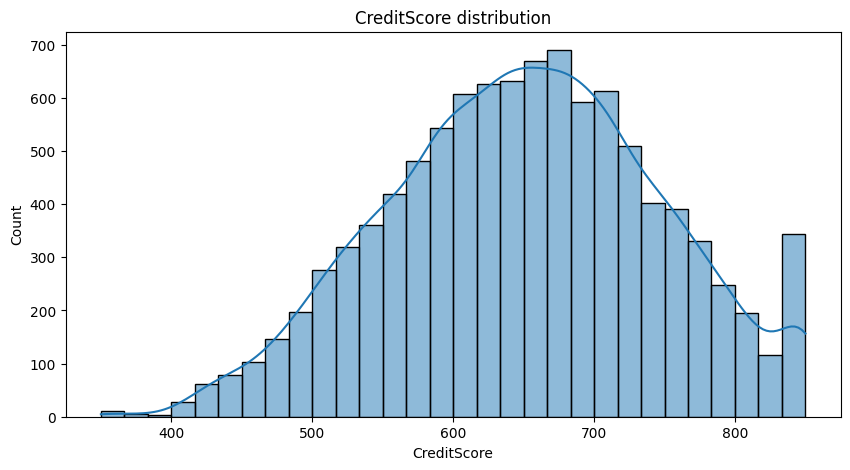

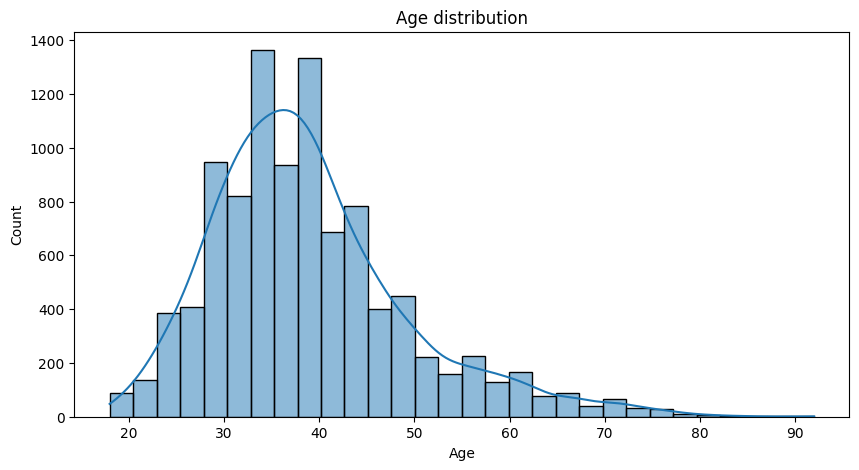

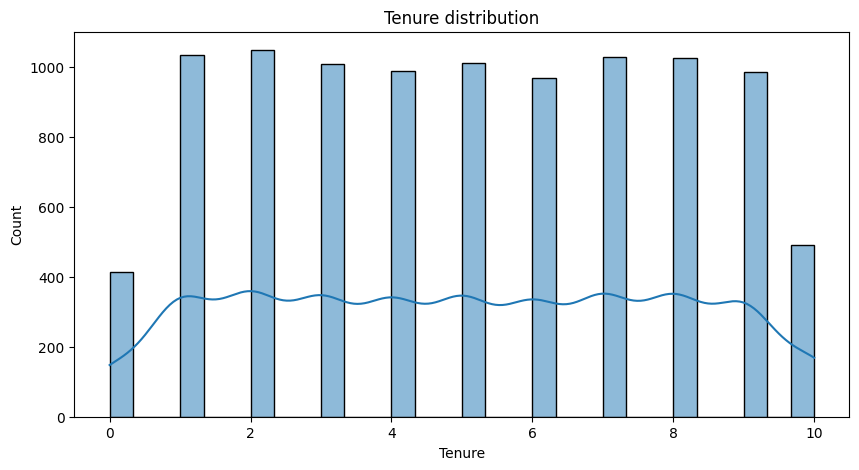

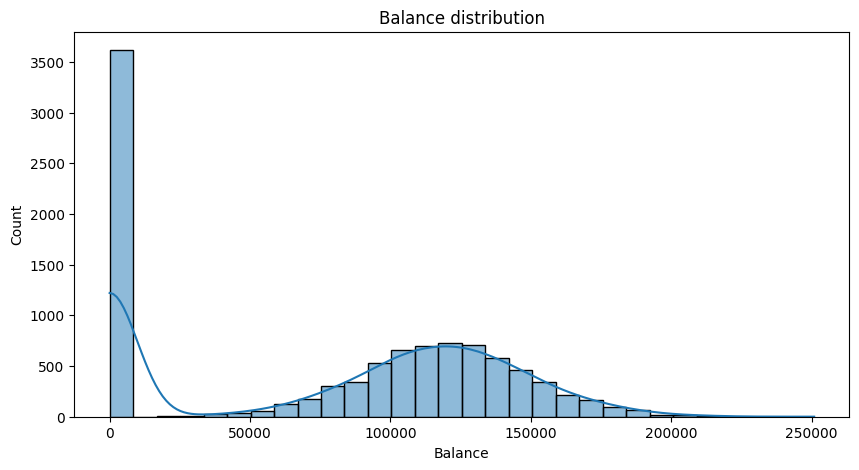

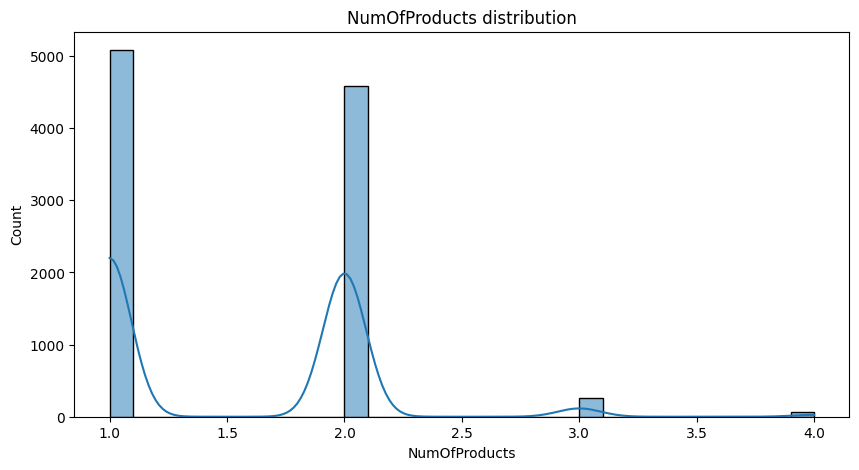

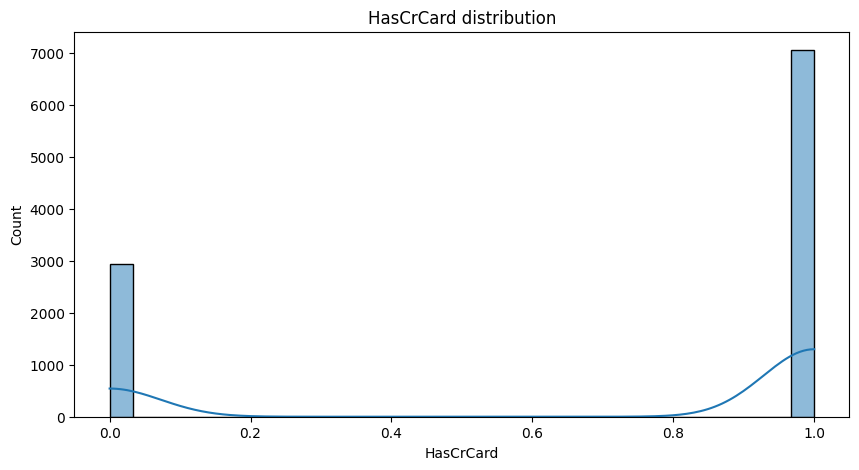

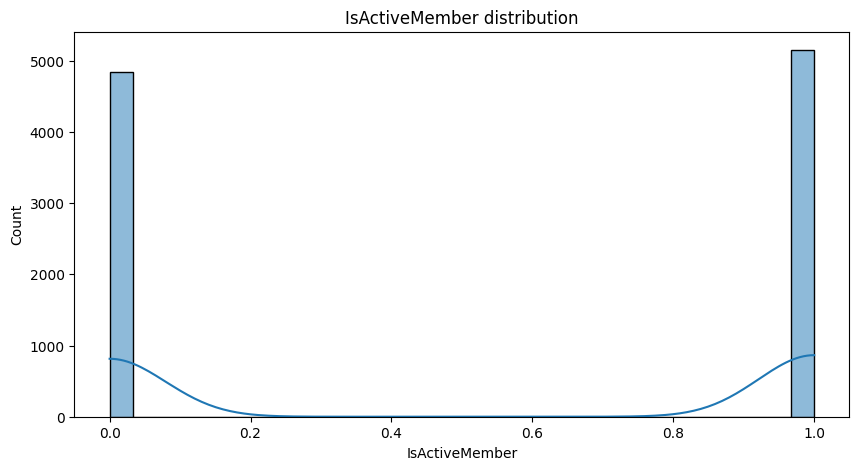

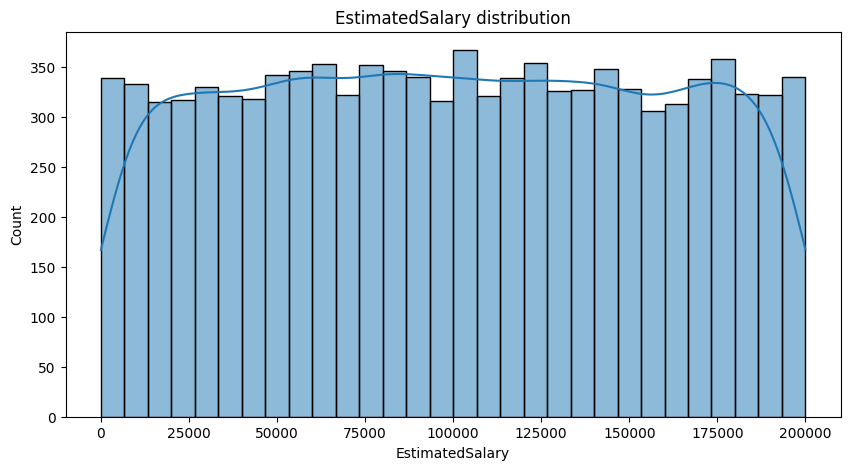

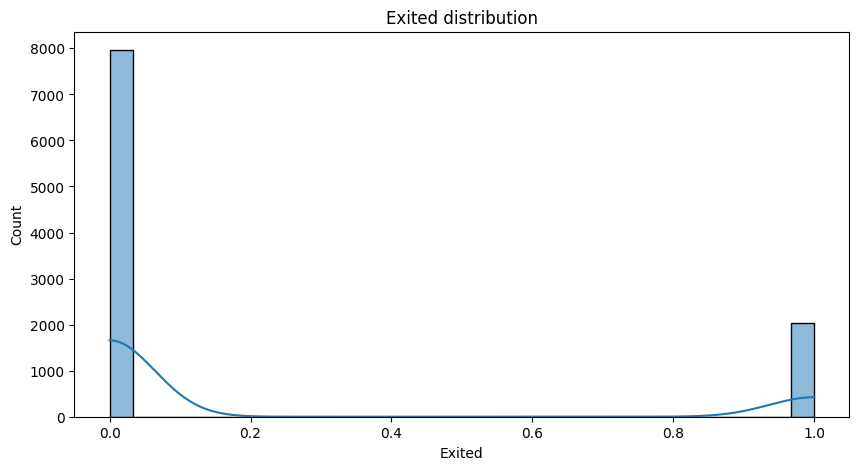

In [148]:
from matplotlib import pyplot as plt
import seaborn as sns


for col in n_colomns:
    plt.figure(figsize=(10, 5))
    plt.title(f"{col} distribution")
    sns.histplot(dataset[col], bins=30, kde=True)
    plt.show()

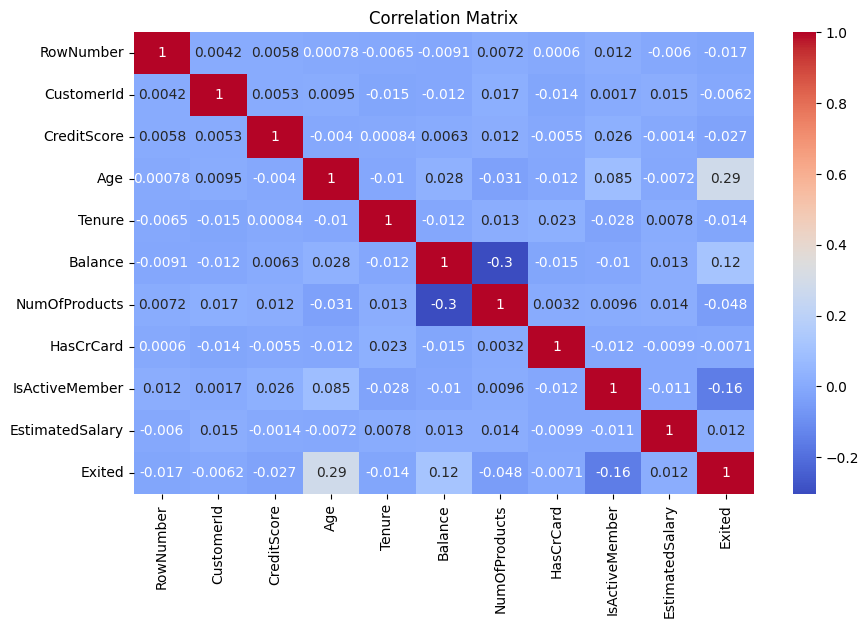

In [149]:
if 'Exited' in dataset.columns:
    corr = dataset.corr(numeric_only=True)
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Splitting the data into training and test sets and normlize data

we did split data into training an test data with split data and chosing also the target (existed)

In [ ]:
# Importing the dataset
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [116]:
import pickle

# After fitting your StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


# Perform hyperparameter tuning using **Keras Tuner**

In [127]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from keras_tuner import RandomSearch

# Build the model (without fitting inside)
def build_model(hp):
    clissifier = Sequential()
    
    clissifier.add(Dense(
        units=hp.Int('units_input', min_value=8, max_value=64, step=8), 
        kernel_initializer='he_normal',
        activation='relu', 
        input_dim=11
    ))
    clissifier.add(Dropout(
        hp.Float('dropout_input', min_value=0.2, max_value=0.5, step=0.1)
    ))
    
    clissifier.add(Dense(
        units=hp.Int('units_hidden1', min_value=8, max_value=64, step=8), 
        kernel_initializer='he_normal',
        activation='relu'
    ))
    clissifier.add(Dropout(
        hp.Float('dropout_hidden1', min_value=0.2, max_value=0.5, step=0.1)
    ))
    
    clissifier.add(Dense(
        units=hp.Int('units_hidden2', min_value=8, max_value=64, step=8), 
        kernel_initializer='he_normal',
        activation='relu'
    ))
    clissifier.add(Dropout(
        hp.Float('dropout_hidden2', min_value=0.2, max_value=0.5, step=0.1)
    ))
    
    clissifier.add(Dense(
        units=1, 
        kernel_initializer='glorot_uniform',
        activation='sigmoid'
    ))

    # Compile the model
    clissifier.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return clissifier


# here we already chosed the num of hidden layers so im done here

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_tuner import Hyperband
from tensorflow.keras import regularizers

# Function to build the model for hyperparameter tuning
# def build_model(hp):
#     model = Sequential()

#     # Input layer with tunable number of units
#     model.add(Dense(
#         units=hp.Int('units_input', min_value=32, max_value=128, step=32),  # Number of units is a hyperparameter
#         activation='relu',  # Activation function
#         input_dim=11  # Input dimension (number of features)
#     ))
    
#     # Add hidden layers based on the number specified by a tunable hyperparameter
#     num_layers = hp.Int('num_layers', 1, 4)  # Number of hidden layers (1 to 4)
    
#     for i in range(num_layers):
#         # Add a dense layer with tunable number of units
#         model.add(Dense(
#             units=hp.Int(f'units_{i+1}', min_value=32, max_value=128, step=32),  # Number of units is a hyperparameter
#             activation='relu'  # Activation function
#         ))
#         # Add a dropout layer to prevent overfitting
#         model.add(Dropout(0.3))  # Dropout rate is fixed at 0.3 (can also be tuned if needed)
    
#     # Output layer with a single unit for binary classification
#     model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary output
    
#     # Compile the model with Adam optimizer and binary crossentropy loss
#     model.compile(
#         optimizer='adam',  # Optimizer
#         loss='binary_crossentropy',  # Loss function for binary classification
#         metrics=['accuracy']  # Metric to monitor
#     )
    
#     return model


# Tuner will start working now with max trails of 10

In [128]:
from keras_tuner.tuners import RandomSearch
from keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

# Create tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='tuner_dir',
    project_name='churn_project'
)

# Run tuner
tuner.search(X_train, y_train, 
             epochs=50, 
             validation_split=0.2,
             callbacks=[early_stopping])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Best Model Test Accuracy: {accuracy}")


Trial 10 Complete [00h 01m 44s]
val_accuracy: 0.8540624976158142

Best val_accuracy So Far: 0.8581250011920929
Total elapsed time: 00h 19m 20s


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8607 - loss: 0.3393
Best Model Test Accuracy: 0.8644999861717224


# Evaluate and visualize model performance.

In [131]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.values)


{'units_input': 64, 'dropout_input': 0.30000000000000004, 'units_hidden1': 64, 'dropout_hidden1': 0.30000000000000004, 'units_hidden2': 16, 'dropout_hidden2': 0.30000000000000004, 'learning_rate': 0.001}


In [134]:
best_model.evaluate(X_test, y_test)
ypred=best_model.predict(X_test)
ypred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8607 - loss: 0.3393
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.28004465],
       [0.34094796],
       [0.16159262],
       ...,
       [0.13102613],
       [0.23243606],
       [0.24095349]], dtype=float32)

# best hyppara
units_input': 64, 'dropout_input': 0.30000000000000004, 'units_hidden1': 64, 'dropout_hidden1': 0.30000000000000004, 'units_hidden2': 16, 'dropout_hidden2': 0.30000000000000004, 'learning_rate': 0.001


In [136]:
# Best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]

# Rebuild model manually
model = build_model(best_hps)

# Retrain it and **save the history**
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50)


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7234 - loss: 0.6087 - val_accuracy: 0.7956 - val_loss: 0.4745
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8003 - loss: 0.4851 - val_accuracy: 0.8019 - val_loss: 0.4442
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7978 - loss: 0.4604 - val_accuracy: 0.8087 - val_loss: 0.4333
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8238 - loss: 0.4471 - val_accuracy: 0.8281 - val_loss: 0.4217
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8120 - loss: 0.4446 - val_accuracy: 0.8288 - val_loss: 0.4117
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8224 - loss: 0.4221 - val_accuracy: 0.8331 - val_loss: 0.4036
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8221 - loss: 0.4176 - val_accuracy: 0.8350 - val_loss: 0.3958
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8221 - loss: 0.4266 - val_accuracy: 0.

# Training and validation loss vs training and validation accuracy

after finding the best model now we trained the best model and we found the loss and validation graph as we see theres no overfiting in the model and the model accuracy is good

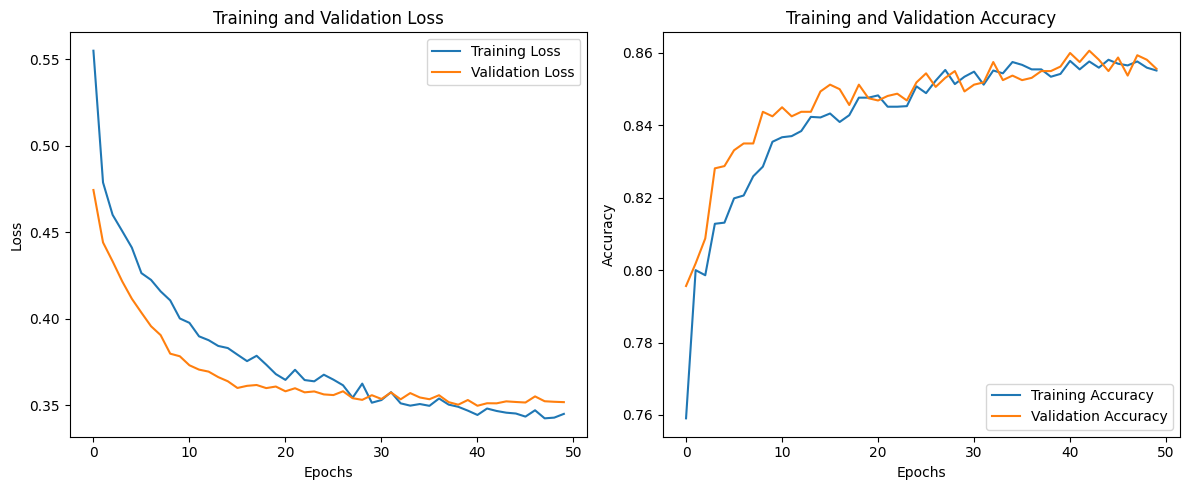

In [137]:
from matplotlib import pyplot as plt

# Plot Loss
plt.figure(figsize=(12, 5))  # Make it a little wider

# Loss subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)  
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [139]:
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5)  

print("Predictions on test set: ", y_pred_binary[:10])


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8630 - loss: 0.3334
Test Loss: 0.3413317799568176
Test Accuracy: 0.8629999756813049
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Predictions on test set:  [[False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]]


# hyperparams tuning using gridsearhcv

with gridsearch cv we can found best hyperparamaiters for our model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Define the model function for GridSearchCV
def create_model(num_layers=1, units=64):
    model = Sequential()
    
    model.add(Dense(units=units, activation='relu', input_dim=11))
    
    for _ in range(num_layers - 1):  
        model.add(Dense(units=units, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'num_layers': [1, 2, 3, 4],  # Test 1 to 4 hidden layers
    'units': [32, 64, 128],  # Test different number of units per layer
    'batch_size': [10, 20],
    'epochs': [50, 100]
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit GridSearchCV on the training data
grid_result = grid.fit(X_train, y_train)

# Get the best number of layers and other parameters
print(f"Best number of layers: {grid_result.best_params_['num_layers']}")
print(f"Best units per layer: {grid_result.best_params_['units']}")


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

#  Conclusion

After preprocessing our dataset, we discovered that the task involves predicting whether a customer will stay with or leave the bank. 

We started by applying data preprocessing steps, including:
- Encoding categorical variables
- Scaling numerical features

Next, we used **Keras Tuner** to find the best hyperparameters for our model, such as:
- Number of units per layer
- Dropout rates
- Learning rate

Using the best set of hyperparameters, we trained a **Multi-Layer Perceptron (MLP)** model.

Our final model achieved:
- **Accuracy**: 0.85
- **Loss**: 0.34

These results indicate that our model can predict customer churn with good performance, providing valuable insights for customer retention strategies.

---
